In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [24]:
# Read the dataset 
data = pd.read_csv('Social_Network_Ads.csv')

# Read the dataset
data = pd.read_csv('Social_Network_Ads.csv')

In [25]:
# Remove 'User ID' form the analysis
data = data.drop(columns=['User ID'])


In [26]:
# Convert Gender to  values
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [27]:
# features "X", target variable "y"
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

In [30]:
# Create and train the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [31]:
# Predict the target values for the test set
y_pred = svm_model.predict(X_test)

Training data shape:  (300, 3)
Test data shape:  (100, 3)
Predicted values:
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]
Model Accuracy: 89.00%


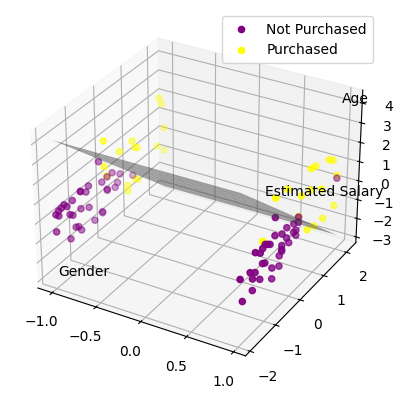

In [32]:
# Shapes of the training and test sets
print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

# The predicted values
print("Predicted values:")
print(y_pred)

# The accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualize the results as 3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], X_test[y_test == 0, 2], c='purple', label='Not Purchased')
ax.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], X_test[y_test == 1, 2], c='yellow', label='Purchased')

# Calculate the decision boundary
coef = svm_model.coef_[0]
intercept = svm_model.intercept_[0]
xx, yy = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 10),
                     np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 10))
zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]

ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)

ax.text(X_test[:, 0].min(), X_test[:, 1].min(), zz.min(), 'Gender', color='Black')
ax.text(X_test[:, 0].max(), X_test[:, 1].max(), zz.max(), 'Age', color='Black')
ax.text(X_test[:, 0].mean(), X_test[:, 1].mean(), zz.mean(), '                Estimated Salary', color='Black')

ax.legend()

# Display the the results
plt.show()